In [1]:
# 1.)   You are given a list of square n-dimensional matrices with increasing n (up to n=1000 with any preferred step). 
#       Perform the following tasks:
import random
import time 
import matplotlib.pyplot as plt
import numpy as np

def get_two_matrix(columns_and_rows):
    matrix_one = []
    matrix_two = []
    # columns_and_rows = random.randint(1,1000)
    for x in range(0,columns_and_rows,1):
        rows = []
        for i in range(0,columns_and_rows,1):
            row_inputs = random.randint(0,10)
            rows.append(row_inputs)
        matrix_one.append(rows)
    for x in range(0,columns_and_rows,1):
        rows = []
        for i in range(0,columns_and_rows,1):
            row_inputs = random.randint(0,10)
            rows.append(row_inputs)
        matrix_two.append(rows)
    return matrix_one, matrix_two, columns_and_rows
    

In [2]:
# 1.a.) Implement the standart matrix multiplication alogorithm using Python without using 
#       any pre-built matrix multiplication function (like those in NumPy)
def matrix_multiplicator(matrix_one, matrix_two, matrix_size):
    new_matrix = []
    column_values = []
    storage = []
    for x in range(0,matrix_size,1):
        for i in range(0,matrix_size,1):
            storage.append(matrix_two[i][x])
        column_values.append(storage)
            
    for y in range(0,matrix_size,1):
        new_matrix_rows = []
        row_of_matrix_one = matrix_one[y]
        for x in range(0,matrix_size,1):
            new_input = 0
            column_of_matrix_two = column_values[x]
            for i in range(0,matrix_size,1):
                input = row_of_matrix_one[i]*column_of_matrix_two[i]
                new_input += input
            new_matrix_rows.append(new_input)
        new_matrix.append(new_matrix_rows)
    # new_matrix is the multiplication of matrix_one and matrix_two


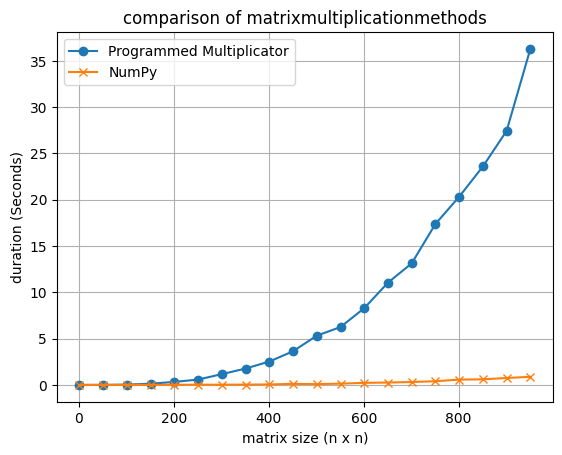

In [3]:
# 1.b.) Analyze and benchmark the runtime of your algorithm on each matrix size. 
#       Use the Python time module to record the time taken for each matrix size.
# 1.c.) Compare your implementation with the built-in matrix multiplication in NumPy. 
#       Find any preferred literature to get familiarized with the concept of (algorithmic) time complexity. 
#       Plot the time complexity for both methods as the matrix size increases.

times1 = []
times2 = []
matrix_sizes = []

for i in range(1,1000,50):
    matrix_sizes.append(i)
    matrix_one, matrix_two, columns_and_rows = get_two_matrix(i)
    start_time1 = time.time()
    matrix_multiplicator(matrix_one, matrix_two, i)
    end_time1 = time.time()
    duration1 = end_time1-start_time1
    times1.append(duration1)

    start_time2 = time.time()
    np.dot(matrix_one, matrix_two)
    end_time2 = time.time()
    duration2 = end_time2-start_time2
    times2.append(duration2)

plt.plot(matrix_sizes, times1, label='Programmed Multiplicator', marker='o')
plt.plot(matrix_sizes, times2, label='NumPy', marker='x')
plt.xlabel('matrix size (n x n)')
plt.ylabel('duration (Seconds)')
plt.title('comparison of matrixmultiplicationmethods')
plt.legend()
plt.grid(True)
plt.show()




In [4]:
# 1.d.) Explain the time complexity of both your implementation and the NumPy implementation. Why do they differ?

# My implementation has 3 for-loops, this means that the programm iterates up to 1000 throw each for-loop. for a 1000x1000 matrix there 
# would be 1000^3 processes, which takes a lot of time, that's the reason why the own implementation takes so long.
# Why numPy is so much faster than my own implementation, one reason is that numPy avoids loops instead it uses vectorized operations, which are
# written in C because its very easy and fast for the computer to handle, on top it has access to optimised Linear Algebra Libraries which makes it faster in Matrix calculations
# because it allows the programm to runn parts simultaneously in different cores. All those points makes numPy way faster than any other implementation. 




In [5]:
# 1.e.) Implement a simple version of Strassen’s algorithm for two-dimensional matrices (with and without the recursion) 
#       and compare its performance with your naıve approach and your implementation with NumPy. 
#       You can use any reference of your choice to get familiarized with Strassen’s algorithm.

def make_two_by_two_matrix():
    matrix = []
    for x in range(0,2,1):
        rows = []        
        for i in range(0,2,1):
            row_inputs = random.randint(0,10)
            rows.append(row_inputs)
        matrix.append(rows)
    return matrix

def naive_approach(matrix_1, matrix_2):
    new_matrix = []
    column_values = []
    storage = []
    for x in range(0,2,1):
        for i in range(0,2,1):
            storage.append(matrix_2[i][x])
        column_values.append(storage)      
    for y in range(0,2,1):
        new_matrix_rows = []
        row_of_matrix_one = matrix_1[y]
        for x in range(0,2,1):
            new_input = 0
            column_of_matrix_two = column_values[x]
            for i in range(0,2,1):
                input = row_of_matrix_one[i]*column_of_matrix_two[i]
                new_input += input
            new_matrix_rows.append(new_input)
        new_matrix.append(new_matrix_rows)
    return new_matrix

def strassen(matrix_1, matrix_2):
    final_matrix = []
    # the following calculations represents the strassen algorithm for 2x2 matrix multiplication (C = A*B)
    M1 = (matrix_1[0][0] + matrix_1[1][1]) * (matrix_2[0][0] + matrix_2[1][1])
    M2 = (matrix_1[1][0] + matrix_1[1][1]) * matrix_2[0][0]
    M3 = matrix_1[0][0] * (matrix_2[0][1] - matrix_2[1][1])
    M4 = matrix_1[1][1] * (matrix_2[1][0] - matrix_2[0][0])
    M5 = (matrix_1[0][0] + matrix_1[0][1]) * matrix_2[1][1]
    M6 = (matrix_1[1][0] - matrix_1[0][0]) * (matrix_2[0][0] + matrix_2[0][1])
    M7 = (matrix_1[0][1] - matrix_1[1][1]) * (matrix_2[1][0] + matrix_2[1][1])
    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6
    row_1 = []
    row_1.append(C11)
    row_1.append(C12)
    final_matrix.append(row_1)
    row_2 = []
    row_2.append(C21)
    row_2.append(C22)
    final_matrix.append(row_2)
    return final_matrix

def NumPy(matrix_1, matrix_2):
    product = np.dot(matrix_1, matrix_2)
    return product

matrix_1 = make_two_by_two_matrix()
matrix_2 = make_two_by_two_matrix()

start_time = time.time()
x = naive_approach(matrix_1, matrix_2)
end_time = time.time()
naive_approach_time = end_time-start_time

start_time = time.time()
y = strassen(matrix_1, matrix_2)
end_time = time.time()
strassen_time = end_time-start_time

start_time = time.time()
z = NumPy(matrix_1, matrix_2)
end_time = time.time()
numPy_time = end_time-start_time

print("naive approach = ", naive_approach_time)
print("strassen algorithm = ", strassen_time)
print("NumPy = ", numPy_time)

    

naive approach =  2.86102294921875e-05
strassen algorithm =  2.2649765014648438e-05
NumPy =  4.673004150390625e-05
